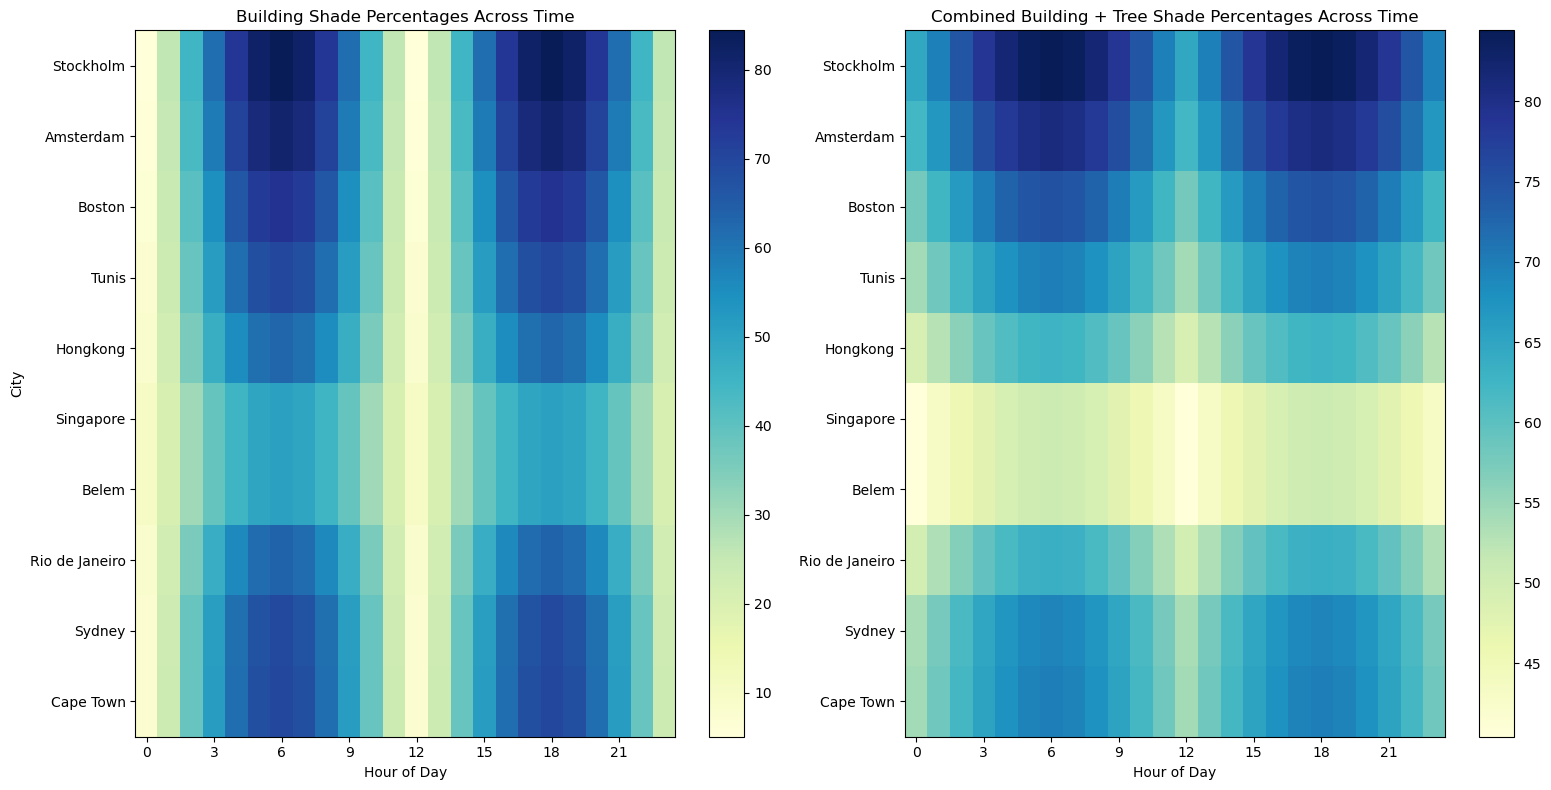

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# City details and coordinates
cities = [
    {"name": "Stockholm", "latitude": 59, "climate": "Cfb"},
    {"name": "Amsterdam", "latitude": 53, "climate": "Cfb"},
    {"name": "Boston", "latitude": 43, "climate": "Dfa"},
    {"name": "Tunis", "latitude": 34, "climate": "Csa"},
    {"name": "Hongkong", "latitude": 22, "climate": "Cwa"},
    {"name": "Singapore", "latitude": 1, "climate": "Af"},
    {"name": "Belem", "latitude": -1, "climate": "Am"},
    {"name": "Rio de Janeiro", "latitude": -23, "climate": "Aw"},
    {"name": "Sydney", "latitude": -33, "climate": "Cfa"},
    {"name": "Cape Town", "latitude": -34, "climate": "Csb"},
]

# Generate placeholder data with pronounced differences
hours = np.arange(0, 24)
num_cities = len(cities)
building_shade = np.zeros((num_cities, len(hours)))
combined_shade = np.zeros((num_cities, len(hours)))

for i, city in enumerate(cities):
    # Adjust amplitude and offset based on latitude
    lat_factor = np.abs(city["latitude"]) / 60  # Scale latitude to 0-1
    base_amplitude = 40 * (1 + lat_factor)  # Larger variation for higher latitudes
    tree_amplitude = 30 * (1 + lat_factor)
    offset = 5 + 5 * (1 - lat_factor)  # Higher base offset for tropical cities
    
    # U-shaped curve for building shade (low midday values)
    building_shade[i, :] = offset + base_amplitude * np.abs(np.cos(np.pi * (hours - 6) / 12))
    
    # Combined shade: building shade + tree contribution (tree contribution peaks at midday)
    tree_midday_boost = tree_amplitude * (1 - np.abs(np.cos(np.pi * (hours - 6) / 12)))  # Trees peak at midday
    combined_shade[i, :] = building_shade[i, :] + tree_midday_boost

# Convert to DataFrame for labeling
building_shade_df = pd.DataFrame(building_shade, index=[city["name"] for city in cities], columns=hours)
combined_shade_df = pd.DataFrame(combined_shade, index=[city["name"] for city in cities], columns=hours)

# Plotting heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Building shade heatmap
im1 = axes[0].imshow(building_shade_df, aspect='auto', cmap='YlGnBu', interpolation='nearest')
axes[0].set_title("Building Shade Percentages Across Time")
axes[0].set_yticks(range(num_cities))
axes[0].set_yticklabels(building_shade_df.index)
axes[0].set_xticks(range(0, 24, 3))
axes[0].set_xticklabels(hours[::3])
axes[0].set_xlabel("Hour of Day")
axes[0].set_ylabel("City")
fig.colorbar(im1, ax=axes[0], orientation='vertical')

# Combined shade heatmap
im2 = axes[1].imshow(combined_shade_df, aspect='auto', cmap='YlGnBu', interpolation='nearest')
axes[1].set_title("Combined Building + Tree Shade Percentages Across Time")
axes[1].set_yticks(range(num_cities))
axes[1].set_yticklabels(combined_shade_df.index)
axes[1].set_xticks(range(0, 24, 3))
axes[1].set_xticklabels(hours[::3])
axes[1].set_xlabel("Hour of Day")
fig.colorbar(im2, ax=axes[1], orientation='vertical')

plt.tight_layout()
plt.show()

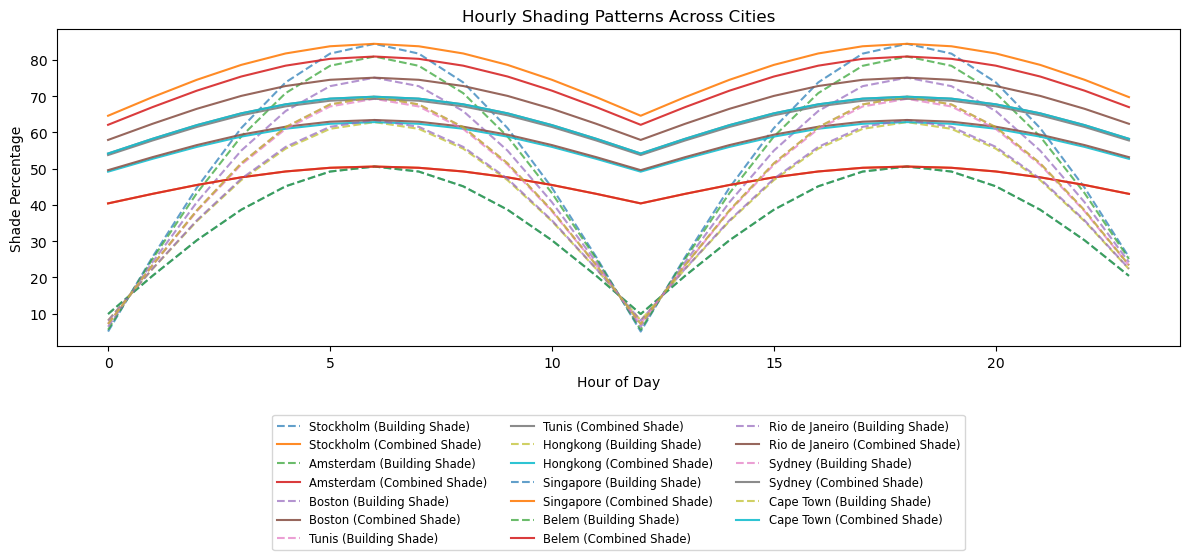

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

for i, city in enumerate(cities):
    ax.plot(hours, building_shade[i, :], label=f"{city['name']} (Building Shade)", linestyle='--', alpha=0.7)
    ax.plot(hours, combined_shade[i, :], label=f"{city['name']} (Combined Shade)", alpha=0.9)

ax.set_title("Hourly Shading Patterns Across Cities")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Shade Percentage")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize="small")
plt.tight_layout()
plt.show()

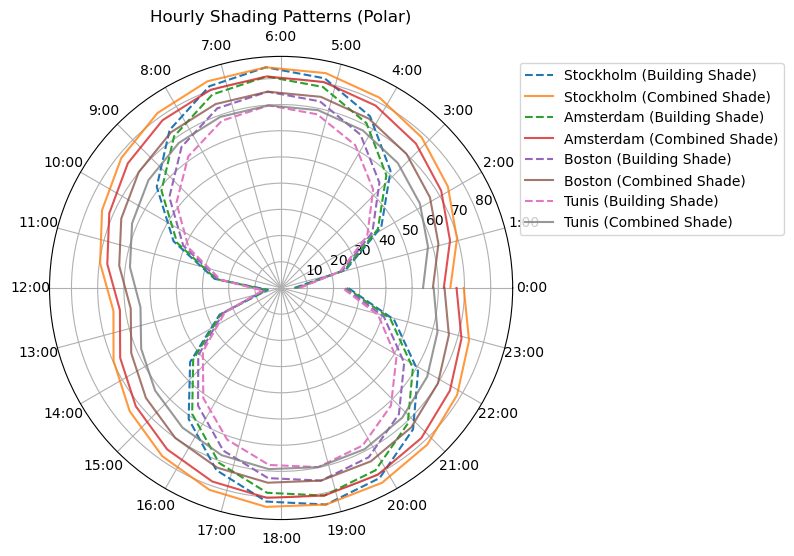

In [7]:
from matplotlib.projections.polar import PolarAxes

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

for i, city in enumerate(cities[:4]):  # Example for 4 cities
    theta = np.linspace(0, 2 * np.pi, len(hours))
    ax.plot(theta, building_shade[i, :], label=f"{city['name']} (Building Shade)", linestyle="--")
    ax.plot(theta, combined_shade[i, :], label=f"{city['name']} (Combined Shade)", alpha=0.8)

ax.set_xticks(np.linspace(0, 2 * np.pi, len(hours), endpoint=False))
ax.set_xticklabels([f"{h}:00" for h in hours])
ax.set_title("Hourly Shading Patterns (Polar)")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

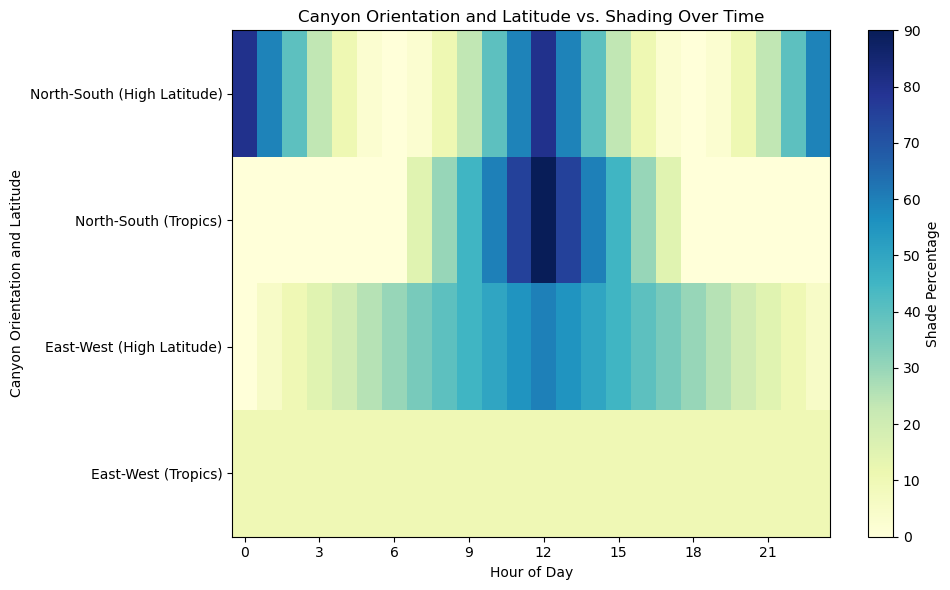

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Canyon types and regions
orientations = ["North-South (High Latitude)", "North-South (Tropics)", 
                "East-West (High Latitude)", "East-West (Tropics)"]
time = np.arange(0, 24)  # Hours of the day
shading_data = np.zeros((len(orientations), len(time)))

# Generate shading data
for i, orientation in enumerate(orientations):
    if "North-South" in orientation:
        if "High Latitude" in orientation:
            shading_data[i, :] = 80 - 80 * np.abs(np.cos(np.pi * (time - 6) / 12))  # Peaks in morning and evening
        elif "Tropics" in orientation:
            shading_data[i, :] = 90 * np.maximum(1 - np.abs((time - 12) / 6), 0)  # High until lunch, then drops to 0
    elif "East-West" in orientation:
        if "High Latitude" in orientation:
            shading_data[i, :] = 60 - 60 * np.abs((time - 12) / 12)  # Dips around midday, higher in morning/evening
        elif "Tropics" in orientation:
            shading_data[i, :] = 10  # Minimal shade throughout the day

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(shading_data, aspect="auto", cmap="YlGnBu", interpolation="nearest")

# Configure axis labels and ticks
ax.set_title("Canyon Orientation and Latitude vs. Shading Over Time")
ax.set_yticks(range(len(orientations)))
ax.set_yticklabels(orientations)
ax.set_xticks(range(0, 24, 3))
ax.set_xticklabels(time[::3])
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Canyon Orientation and Latitude")
fig.colorbar(im, ax=ax, orientation="vertical", label="Shade Percentage")
plt.tight_layout()
plt.show()